# Dataset Information
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

## What exactly do we mean by Mental Health at workplace?

Mental health affects your emotional, psychological and social well-being. It affects how we think, feel, and act. It also helps determine how we handle stress, relate to others, and make choices. In the workplace, communication and inclusion are keys skills for successful high performing teams or employees. The impact of mental health to an organization can mean an increase of absent days from work and a decrease in productivity and engagement.

## What's covered by this analysis?
In this notebook, I'll get all audience be familiar with the dataset, data preparation, exploration and visualization, and with how to build a baseline model.

# Environment Setup

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("osmi/mental-health-in-tech-survey")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/osmi/mental-health-in-tech-survey/versions/3


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#basic libraries

import numpy as np
import pandas as pd
import os

#visualization libraries

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Understand the dataset

In [ ]:
csv_file = os.path.join(path, os.listdir(path)[0])

# Load the CSV file into a pandas DataFrame
m_health = pd.read_csv(csv_file)

# Display the first few rows
m_health.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

In [ ]:
m_health.info()
#some fields are not in right data type, like timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
m_health.describe(include='object')

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,1259,744,1241,1259,1259,995,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,49,48,45,2,2,2,4,6,2,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,615,751,138,1095,767,637,465,290,883,...,563,490,925,774,516,1008,557,576,1075,5


# Data Cleaning

In [ ]:
m_health['Date'] = pd.to_datetime(m_health['Timestamp']).dt.date
# convert the Timestamp into date data format

In [ ]:
m_health['Date'].value_counts()

,count
Date,
2014-08-27,614
2014-08-28,331
2014-08-29,160
2015-02-21,38
2014-08-30,23
2014-09-01,15
2014-09-02,9
2015-02-24,7
2014-08-31,7


## Age cleanup

### There're some answers which make no sense (<0 or >120). To do further classfication, we need to take a way to drop the unreasonale ages and put labels for age groups.


In [ ]:
m_health[(m_health['Age']) <0 & (m_health['Age'] >100)]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Date
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,No,No,Some of them,Yes,No,No,Don't know,No,NaN,2014-08-27
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Yes,No,No,No,No,Maybe,Don't know,No,NaN,2014-08-28
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered,2014-08-30


In [ ]:
# Define age bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Age ranges
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-100']

# Create an 'age_range' column based on the bins
m_health['age_range'] = pd.cut(m_health['Age'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each age range
age_range_counts = m_health['age_range'].value_counts().sort_index()

print(age_range_counts)

# deal with the abnomalities
m_health = m_health[(m_health['Age']) >0 & (m_health['Age'] <=100)]
# 3 rows out of range so here simply drop them

age_range
0-18        3
19-25     156
26-35     707
36-45     320
46-55      51
56-65      15
66-100      2
Name: count, dtype: int64


## Gender cleanup
### user inputed their gender so the output is disorganized. Here we need to categorize gender category

In [ ]:
m_health['Gender'].value_counts()

,count
Gender,
Male,614
male,205
Female,121
M,116
female,62
F,38
m,34
f,15
Make,4


In [ ]:
def categorize_gender(gender):
    gender = gender.lower()  # Convert to lowercase for comparison
    if gender in ['male', 'm', 'man', 'make', 'malr', 'male-ish', 'maile', 'mail', 'male (cis)', 'guy (-ish) ^_^', 'cis male', 'cis man', 'something kinda male?', 'ostensibly male, unsure what that really means']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'female (cis)', 'female (trans)', 'trans-female', 'cis female', 'female (cis)', 'trans woman', 'femail', 'femake']:
        return 'Female'
    elif gender in ['non-binary', 'genderqueer', 'queer', 'fluid', 'neuter', 'enby', 'androgyne', 'agender', 'male leaning androgynous', 'queer/she/they', 'all']:
        return 'Non-Binary/Other'
    else:
        return 'Invalid/Unclear'

m_health['gender_category'] = m_health['Gender'].apply(categorize_gender)
m_health['gender_category'].value_counts()
m_health = m_health.drop(['Gender'], axis=1)
m_health['gender_category'].value_counts()

,count
gender_category,
Male,987
Female,248
Non-Binary/Other,11
Invalid/Unclear,10


## Other cleanup & Visualization

In [ ]:
m_health['no_employees'].value_counts()
m_health = m_health.rename(columns={'no_employees': 'num_employees'})

In [ ]:
m_health['Country'].value_counts()
# most surveys were from US, and lots of countries only have 1 or 2 respondents. That means the geographic distribution is unmeaningful.
#We can drop the Country and State info if we don't want to analyze USA speficially

,count
Country,
United States,749
United Kingdom,184
Canada,72
Germany,45
Ireland,27
Netherlands,27
Australia,21
France,13
India,10


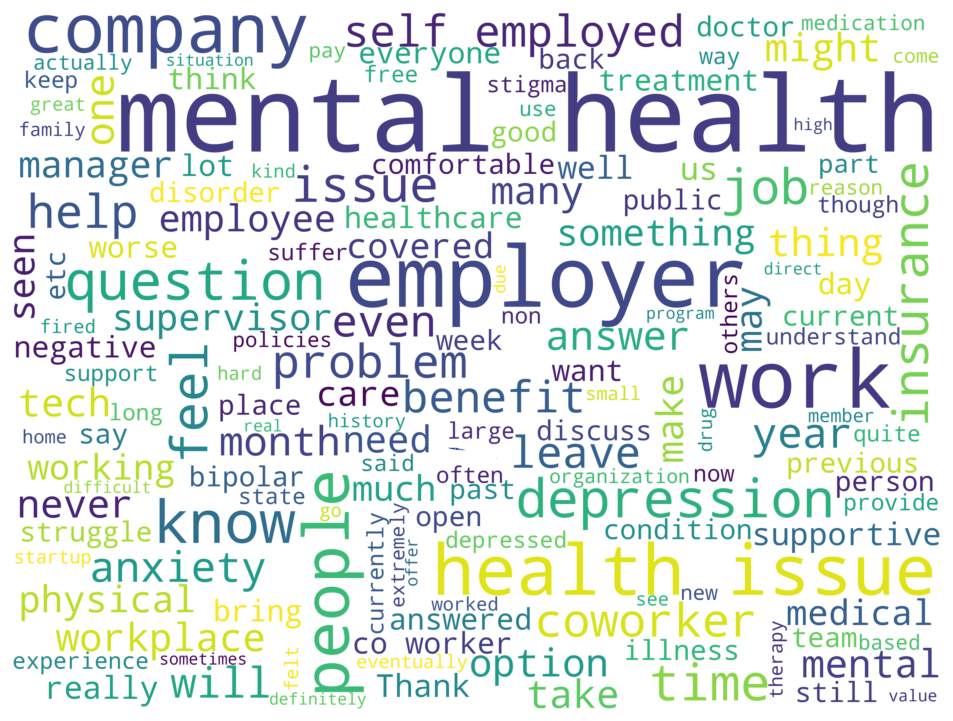

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

words = ''.join(m_health['comments'].dropna())


plt.figure(figsize=(10,10), dpi=120)

wordcloud = WordCloud(max_words=150,
                       stopwords = STOPWORDS,
                       background_color = "white",
                       mask = np.array(Image.open("/content/wordcloud.jpg")),
                       contour_color='#023075',
                       contour_width=1,
                       width=1500, height=700).generate(words)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

In [ ]:
m_health = m_health.drop(['Timestamp', 'Country', 'state', 'comments', 'Date', 'age_range'], axis=1)

In [ ]:
m_health.describe(include='object')

,self_employed,family_history,treatment,work_interfere,num_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender_category
count,1238,1256,1256,993,1256,1256,1256,1256,1256,1256,...,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
unique,2,2,2,4,6,2,2,3,3,3,...,5,3,3,3,3,3,3,3,2,4
top,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,Male
freq,1093,765,635,464,290,882,1030,475,499,841,...,562,489,923,773,514,1006,556,574,1073,987


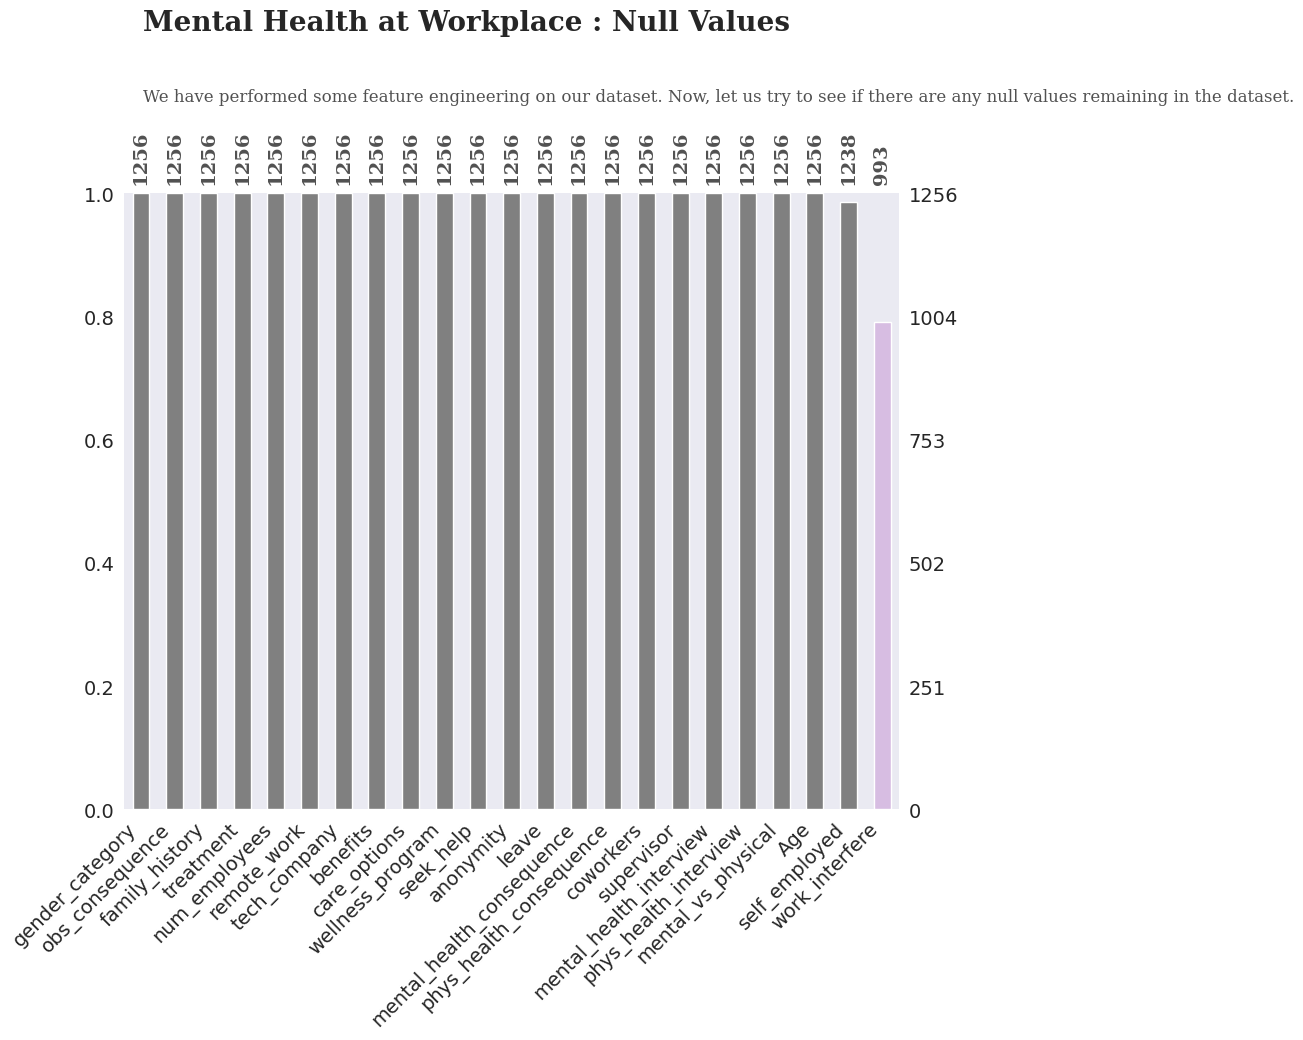

In [ ]:
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
msno.bar(m_health,fontsize =14, color = color, sort = 'descending', figsize = (10,8))

plt.text(0.05,1.265,'Mental Health at Workplace : Null Values', {'font':'serif', 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''We have performed some feature engineering on our dataset. Now, let us try to see if there are any null values remaining in the dataset.''', {'font':'serif', 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90,
                   **{'font':'serif','size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()


## The result shows there're 2 columns containing NULL values
### 2. self_employed: there're 16 NULL values
### 3. work_interfere: there're 263 NULL values

In [ ]:
m_health['work_interfere'] = m_health['work_interfere'].fillna('NaN' )
print(m_health['work_interfere'].unique())
## replace the null value to NaN

['Often' 'Rarely' 'Never' 'Sometimes' 'NaN']


In [ ]:
m_health['self_employed'] = m_health['self_employed'].fillna('No')
print(m_health['self_employed'].unique())
## most of data is no self_employed, so here we fill with No

['No' 'Yes']


In [ ]:
m_health.isnull().sum()

,0
Age,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
num_employees,0
remote_work,0
tech_company,0
benefits,0
care_options,0


# Data Exploration
Open Sourcing Mental Illness is a non-profit, corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities. OSMI began in 2013, with Ed Finkler speaking at tech conferences about his personal experiences as a web developer and open source advocate with a mental health disorder. The response was overwhelming, and thus OSMI was born. Every year, OSMI came out with a new survey to see how employees want to get mental health treatment in tech companies around the world and I pick the survey from 2014.

This survey is filled by respondents who suffer from mental health disorders (diagnose or un-diagnosed by medical, even it's just a feeling) in tech companies and see if any factors can affect the employee to get treatment or not.

In the block, I'll start from whether the respondents got treatment or not and explore the relationship between other indicators and it.

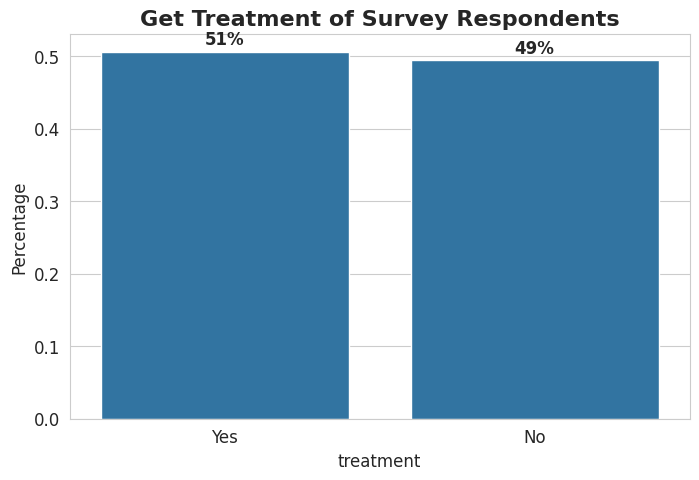

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=16, fontweight='bold')
eda_percentage = m_health['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

# 51% respondents get treatment

### The let's explore the other variables by treatment

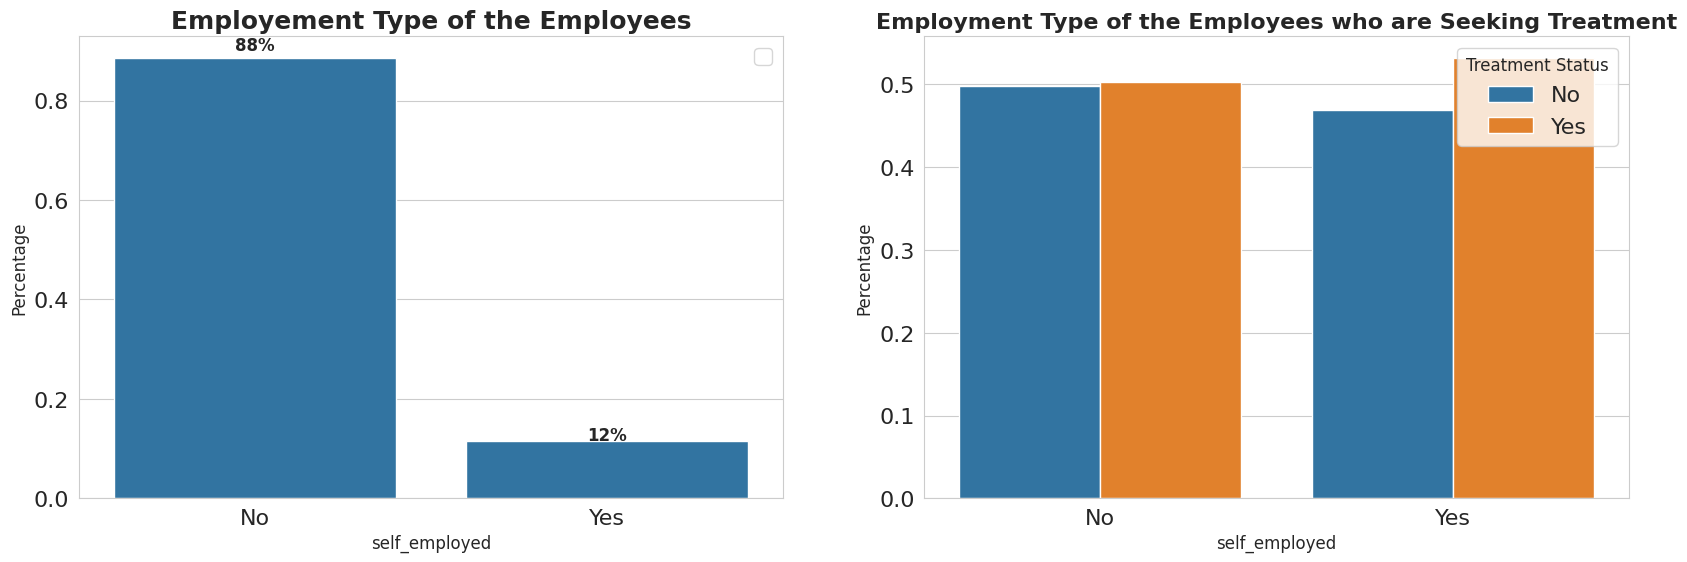

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = m_health['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employement Type of the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1, 2, 2)
# Calculate percentage of self_employed based on treatment
treatment_percentage = m_health.groupby(['self_employed', 'treatment']).size().reset_index(name='Count')
treatment_percentage['Percentage'] = treatment_percentage['Count'] / treatment_percentage.groupby('self_employed')['Count'].transform('sum')

# Create a barplot with hue
sns.barplot(x='self_employed', y='Percentage', hue='treatment', data=treatment_percentage)

plt.title('Employment Type of the Employees who are Seeking Treatment', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment Status', fontsize=16)

plt.show()

# 'Are you self-employed?'.
# 88% were not self_employed and it's unrelated to their treatment status according to the survey.


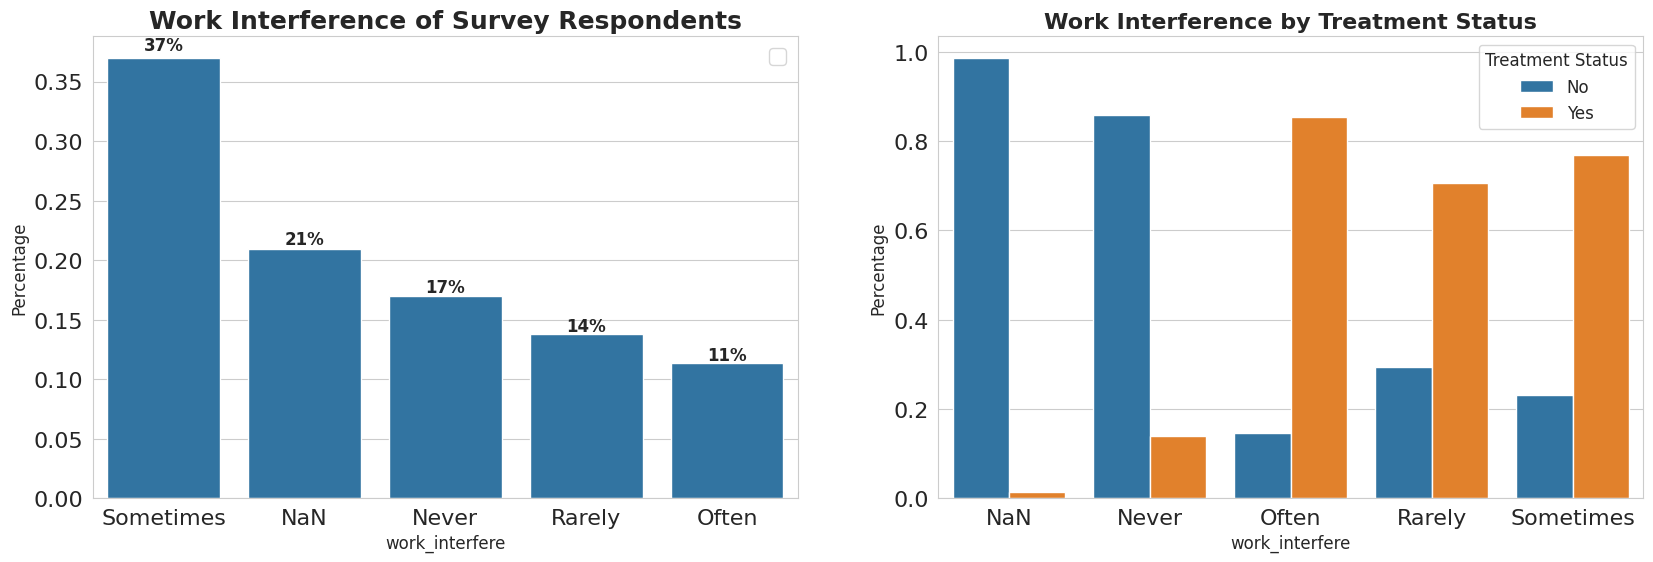

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = m_health['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1, 2, 2)
# Calculate percentage of work_interfere based on treatment
treatment_percentage = m_health.groupby(['work_interfere', 'treatment']).size().reset_index(name='Count')
treatment_percentage['Percentage'] = treatment_percentage['Count'] / treatment_percentage.groupby('work_interfere')['Count'].transform('sum')


sns.barplot(x='work_interfere', y='Percentage', hue='treatment', data=treatment_percentage)

plt.title('Work Interference by Treatment Status', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment Status', fontsize=12)

# Show the plot
plt.show()

# 'If you have a mental health condition, do you feel that it interferes with your work?'
# 37% were interfered by mental disorder sometimes and the frequency did impact their treatment status
# the people who chose 'Sometimes' had the highest number of people who actually had a mental condition.
# Although some people answered 'Never', they may still seek the mental treatment.

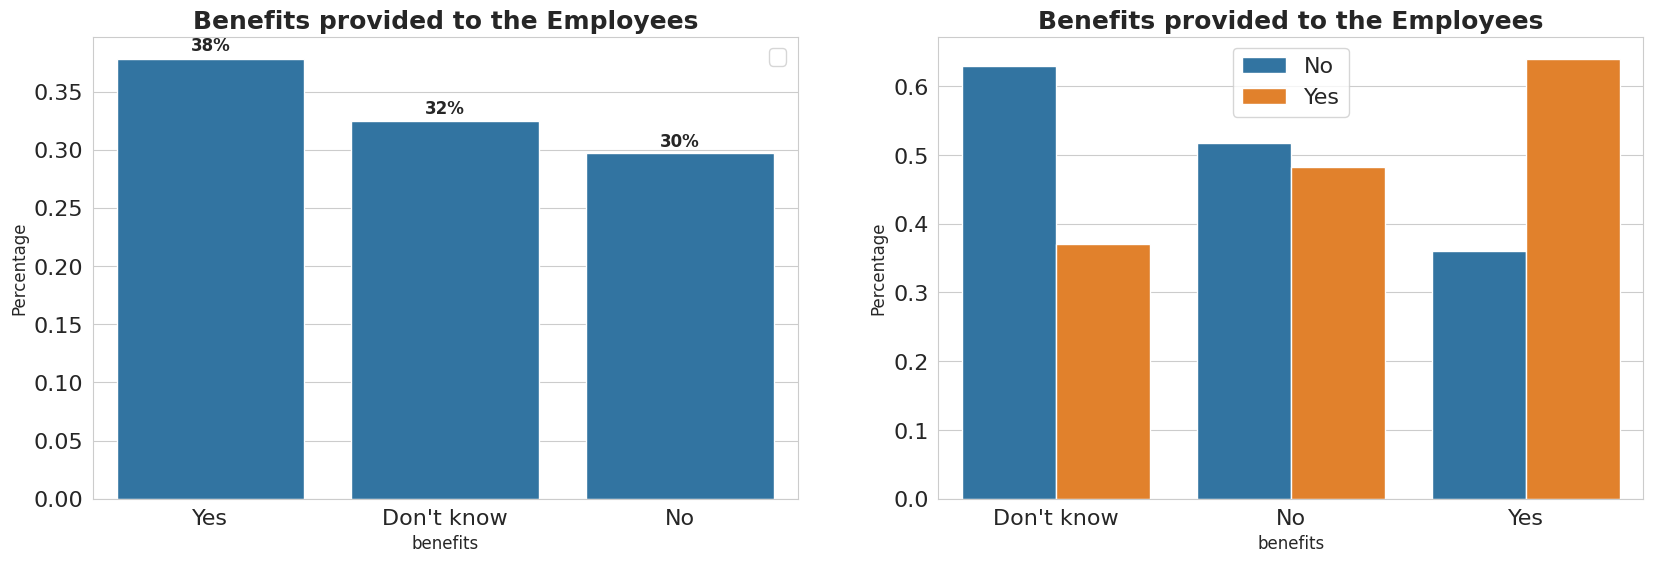

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = m_health['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1, 2, 2)
# Calculate percentage of benefits based on treatment
treatment_percentage = m_health.groupby(['benefits', 'treatment']).size().reset_index(name='Count')
treatment_percentage['Percentage'] = treatment_percentage['Count'] / treatment_percentage.groupby('benefits')['Count'].transform('sum')


sns.barplot(x='benefits', y='Percentage', hue='treatment', data=treatment_percentage)

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# 'Does your employer provide mental health benefits?'.

# 38% of the respondents said yes, but 32% didn't even know whether they were provided this benefit.
# people who said YES to mental health benefits, around 63% of them said that they were seeking medical help.
# people who said NO for the mental health benefits provided by the company, close to 45% of them who want to seek mental health treatment.

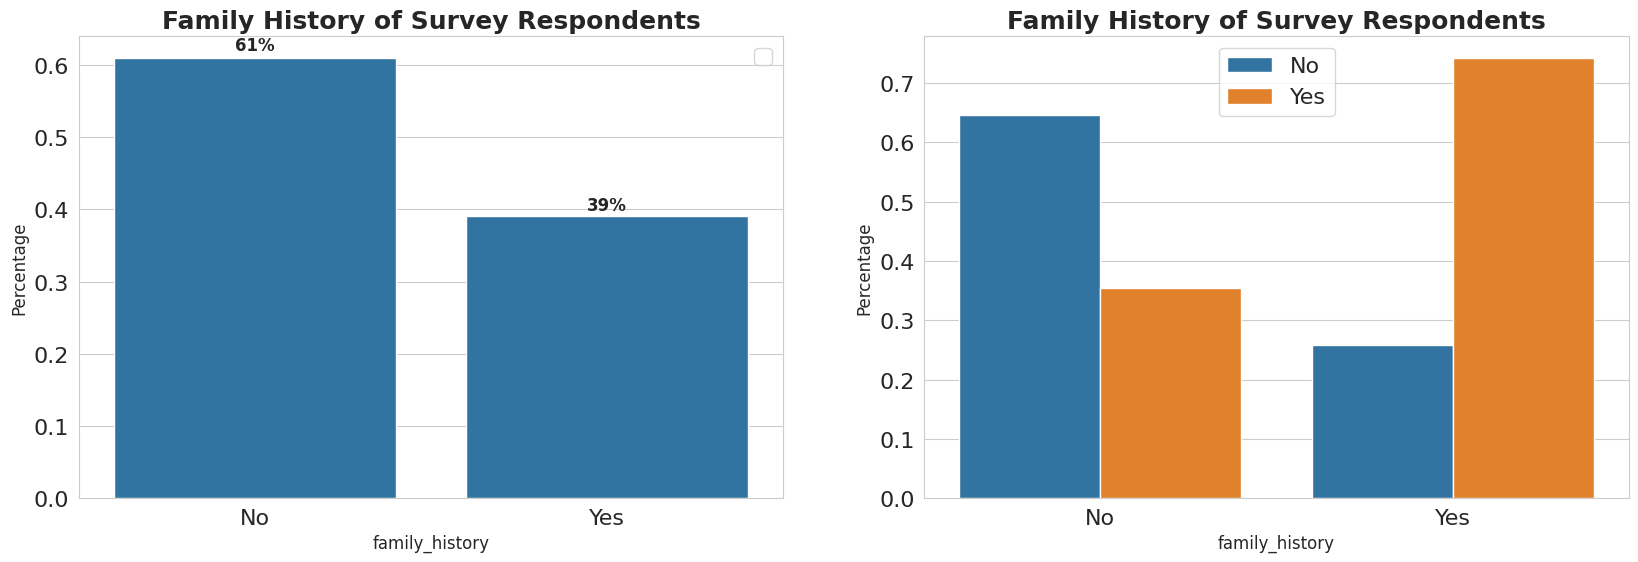

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = m_health['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1, 2, 2)
# Calculate percentage of family_history based on treatment
treatment_percentage = m_health.groupby(['family_history', 'treatment']).size().reset_index(name='Count')
treatment_percentage['Percentage'] = treatment_percentage['Count'] / treatment_percentage.groupby('family_history')['Count'].transform('sum')


sns.barplot(x='family_history', y='Percentage', hue='treatment', data=treatment_percentage)

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

# 'Do you have a family history of mental illness?'.

# 39% have a family history of mental illness, they're more willing to get treatment.

# Data correlation

In [ ]:
list_col=['Age', 'gender_category', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'num_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col:
    print('{} :{} ' . format(col.upper(),m_health[col].unique()))


AGE :[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21          43          56
          60          54         329          55 99999999999          48
          20          57          58          47          62          51
          65          49           5          53          61           8
          11          72] 
GENDER_CATEGORY :['Female' 'Male' 'Invalid/Unclear' 'Non-Binary/Other'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' 'NaN'] 
NUM_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'N

In [ ]:
# Label Encoding the categorical variables

# All the columns except the 'Age', consist of object type values.

from sklearn.preprocessing import LabelEncoder
object_cols = ['gender_category', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'num_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(m_health[col])
    m_health[col] = label_encoder.transform(m_health[col])

<Axes: >

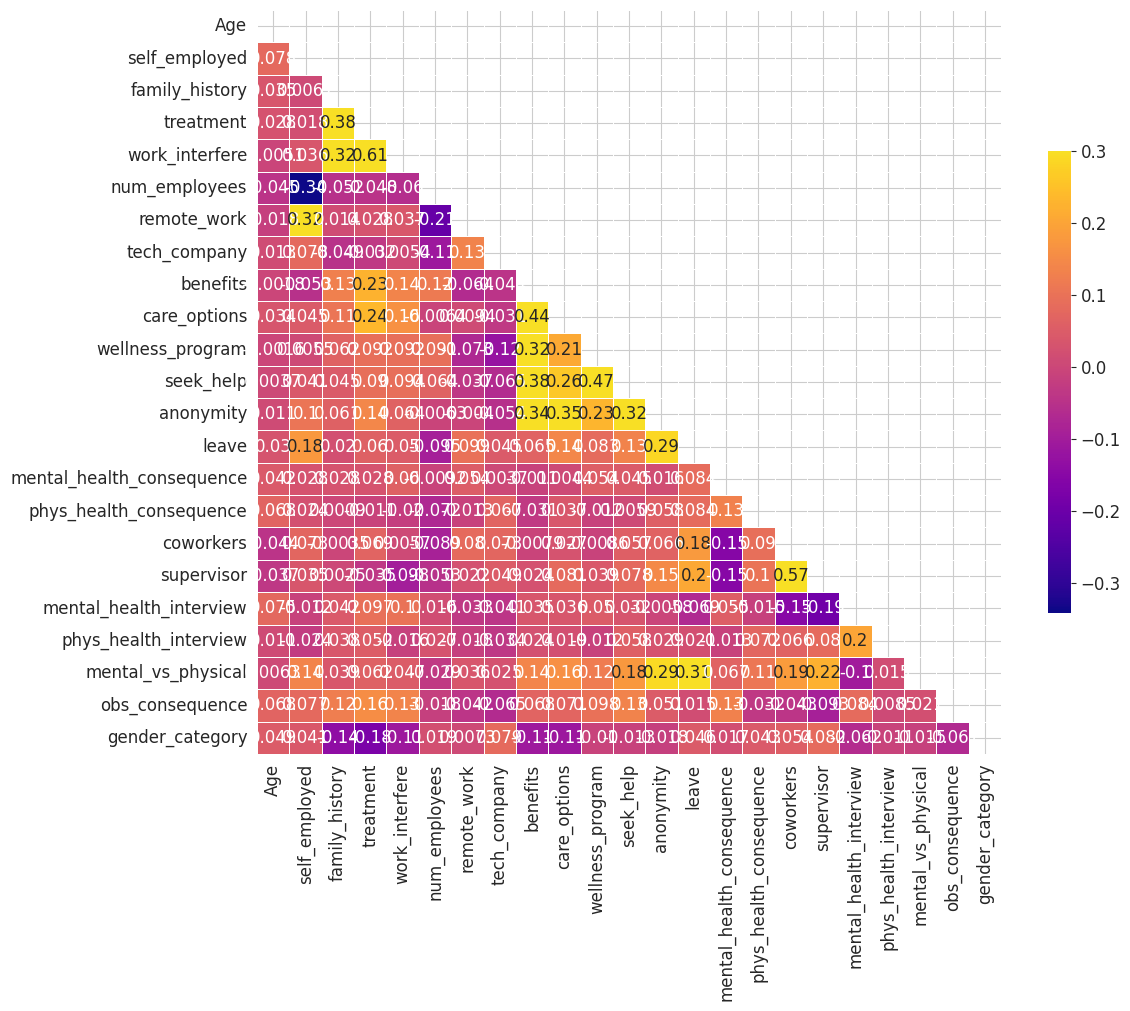

In [ ]:
# Compute the correlation matrix
corr = m_health.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='plasma', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

# Prediction Model
In this part, we'll use the features to predict whether the person gets the treatment or not

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics

In [ ]:
# split the train and test set
from sklearn.model_selection import train_test_split
X = m_health.drop('treatment', axis = 1)
y = m_health['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [ ]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20)]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20)}

In [ ]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8063660477453581
KNeighborsClassifier 0.6551724137931034
DecisionTreeClassifier 0.7718832891246684
RandomForestClassifier 0.8222811671087533
GradientBoostingClassifier 0.8116710875331565


Text(46.722222222222214, 0.5, 'Actual')

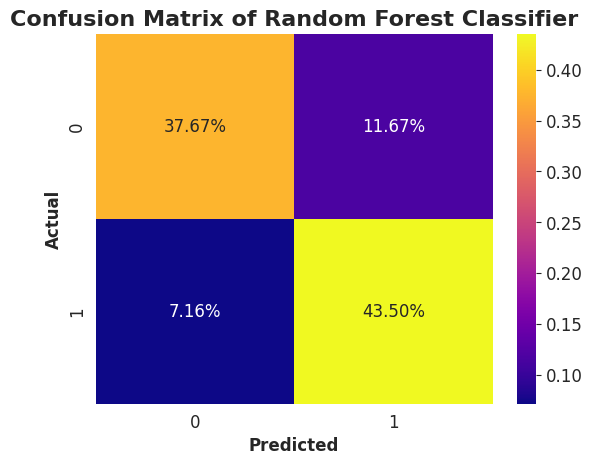

In [ ]:

gbc = RandomForestClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='plasma')
plt.title('Confusion Matrix of Random Forest Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

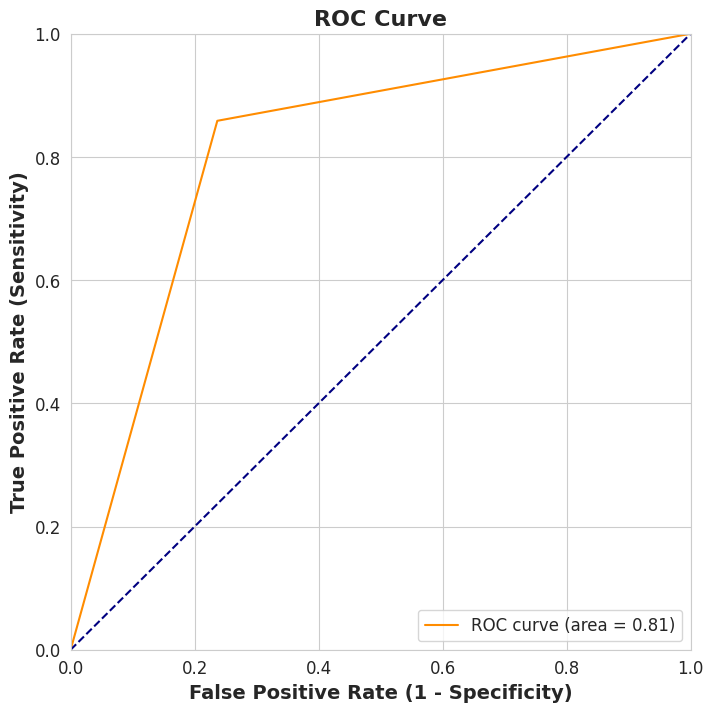

(array([0.        , 0.23655914, 1.        ]),
 array([0.        , 0.85863874, 1.        ]),
 array([inf,  1.,  0.]))

In [ ]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)